# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pandas.read_csv('college_completion.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [94]:
data.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [95]:
# normalized - cat x cat
pd.crosstab(data['state'], data['hbcu'], normalize='columns')

hbcu,X
state,
Alabama,0.159574
Arkansas,0.031915
Delaware,0.010638
District of Columbia,0.021277
Florida,0.042553
Georgia,0.074468
Kentucky,0.010638
Louisiana,0.063830
Maryland,0.042553


***Observation:*** 
Alabama has the most It's interesting to see that Montana and Rhode Island has no private for-profit schools, while Wyoming has no private not-for-profit schools. Alaska and Nevada have a very low amount of private not-for-profit schools.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [101]:
df = pd.read_csv('college_completion.xlsx', low_memory=False)
df['log_student_count'] = np.log(df['student_count'])
df

,index,unitid,chronname,city,state,level,control,basic,hbcu_old,hbcu,...,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,log_student_count
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,Yes,...,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,8.306719
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,No,...,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0,9.350276
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,No,...,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0,5.774552
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,No,...,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0,8.647519
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,Yes,...,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0,8.585973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,No,...,NaN,NaN,NaN,NaN,43,81,NaN,NaN,12.0,4.700480
3794,3794,462354,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,No,...,NaN,NaN,NaN,NaN,74,81,NaN,NaN,33.0,4.941642
3795,3795,466921,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,No,...,NaN,NaN,NaN,NaN,20,81,NaN,NaN,8.0,6.190315
3796,3796,474881,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,No,...,NaN,NaN,NaN,NaN,5,81,NaN,NaN,145.0,4.990433


In [102]:
df.columns.to_list()

['index',
 'unitid',
 'chronname',
 'city',
 'state',
 'level',
 'control',
 'basic',
 'hbcu_old',
 'hbcu',
 'flagship',
 'long_x',
 'lat_y',
 'site',
 'student_count',
 'awards_per_value',
 'awards_per_state_value',
 'awards_per_natl_value',
 'exp_award_value',
 'exp_award_state_value',
 'exp_award_natl_value',
 'exp_award_percentile',
 'ft_pct',
 'fte_value',
 'fte_percentile',
 'med_sat_value',
 'med_sat_percentile',
 'aid_value',
 'aid_percentile',
 'endow_value',
 'endow_percentile',
 'grad_100_value',
 'grad_100_percentile',
 'grad_150_value',
 'grad_150_percentile',
 'pell_value',
 'pell_percentile',
 'retain_value',
 'retain_percentile',
 'ft_fac_value',
 'ft_fac_percentile',
 'vsa_year',
 'vsa_grad_after4_first',
 'vsa_grad_elsewhere_after4_first',
 'vsa_enroll_after4_first',
 'vsa_enroll_elsewhere_after4_first',
 'vsa_grad_after6_first',
 'vsa_grad_elsewhere_after6_first',
 'vsa_enroll_after6_first',
 'vsa_enroll_elsewhere_after6_first',
 'vsa_grad_after4_transfer',
 'vsa_gra

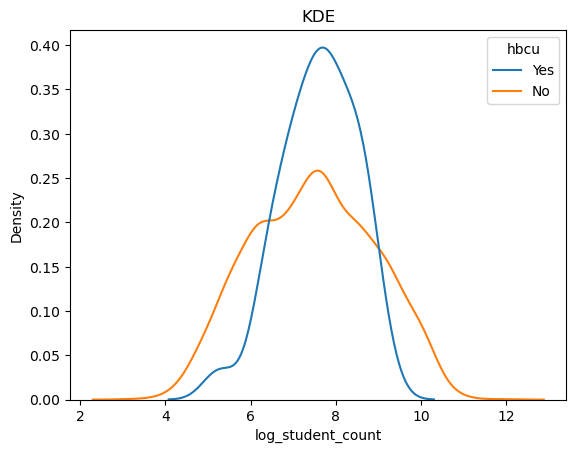

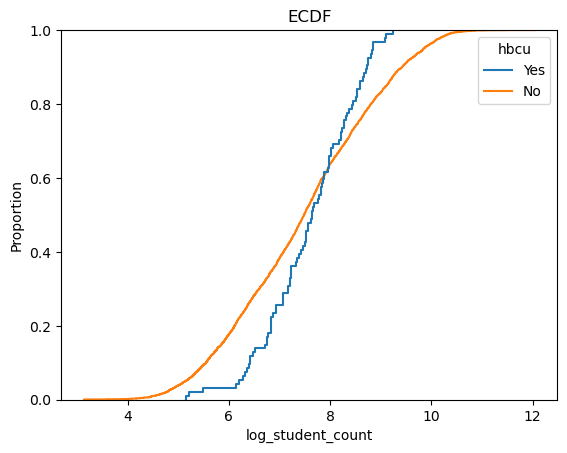

student_count                                                          \
             count        mean          std    min     25%     50%     75%   
hbcu                                                                         
X             94.0  2788.93617  2206.003821  172.0  1064.0  2074.0  3895.0   

               
          max  
hbcu           
X     10238.0

In [103]:
conditioner = 'hbcu'
sns.kdeplot( data=df, x='log_student_count', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=df, x='log_student_count', hue=conditioner).set(title='ECDF')
plt.show()
data.loc[:,['student_count', conditioner]].groupby(conditioner).describe()

***Observation:*** 
According to the KDE graph, with this dataset, more students attend HBCUs than non-HBCU institutions. However, based on the ECDF, more HBCUs have smaller enrollments than non-HBCUs. Both school types have about 60% of enrollment.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

-------------------

Delete

,student_count
cohort_size,
1.0,712.821429
2.0,558.500000
3.0,968.647059
4.0,2529.857143
5.0,1334.684211
...,...
7308.0,38730.000000
7419.0,39979.000000
8025.0,44072.000000


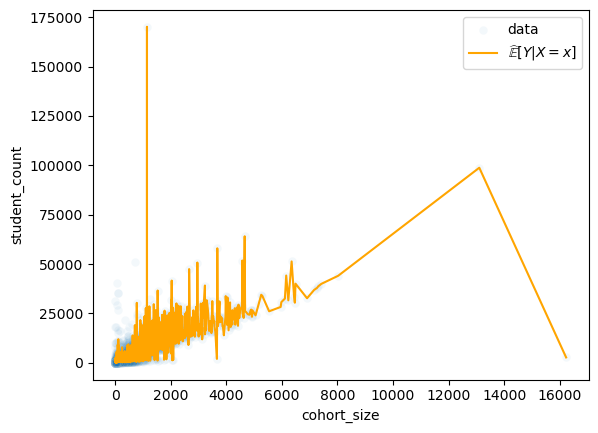

In [123]:
means = df.loc[:,['student_count','cohort_size']].groupby('cohort_size').mean()
sns.scatterplot(data=df, y='student_count', x='cohort_size',alpha=.05, label='data')
sns.lineplot(data=means, x='cohort_size',y='student_count',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

means

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome